Random Forest
Question 1:
Accuracy of gini criterion: 0.6

Question 2:
thalach    0.135485
chol       0.126809
age        0.116245
oldpeak    0.114091
ca         0.106275
tresbps    0.105638
thal       0.075931
cp         0.067564
exang      0.045160
slope      0.034991
sex        0.028953
restecg    0.025457
fbs        0.017401
dtype: float64
The top 5 imporant features is: thalach, chol, age, oldpeak and ca

Question 3:
Accuracy of gini criterion of top 5 features: 0.55

Question 4:
Accuracy of gini criterion of top 5 features: 0.6166666666666667

Question 5:


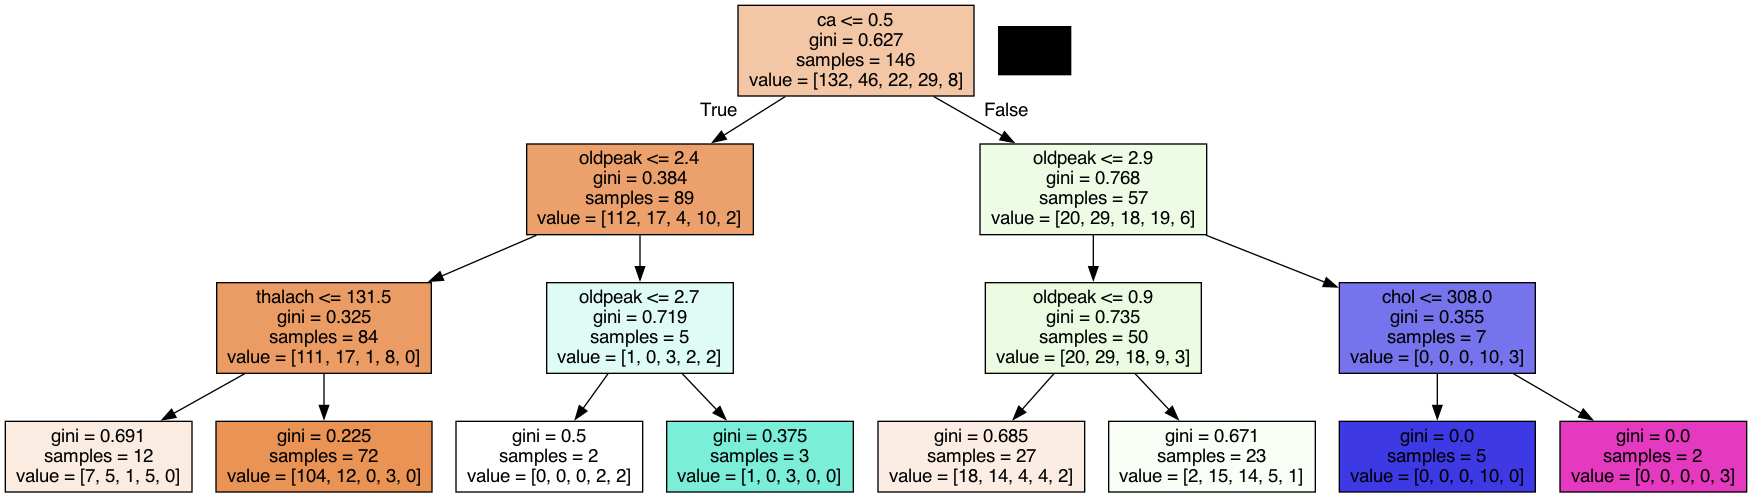

In [92]:
import pandas
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree

data = pandas.read_csv('heart-disease-dataset2.csv')
data = data.replace('?', numpy.nan)
data = data.dropna()

x = data.drop("result", axis=1)
y = data['result']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print ("Random Forest")
rf_gini = RandomForestClassifier(criterion='gini', random_state=42)

rf_gini.fit(X_train, Y_train)

print("Question 1:")
print("Accuracy of gini criterion: " + str(rf_gini.score(X_test, Y_test)))

print("\nQuestion 2:")
features = pandas.Series(rf_gini.feature_importances_, index=list(x.columns.values)).sort_values(ascending=False)
print("{}".format(features))
print("The top 5 imporant features is: thalach, chol, age, oldpeak and ca")

print("\nQuestion 3:")
x_top5 = data.loc[:,["thalach", "chol", "age", "oldpeak", "ca"]]
X_train_top5, X_test_top5, Y_train_top5, Y_test_top5 = train_test_split(x_top5, y, test_size=0.2, random_state=42)

rf_gini_top5 = RandomForestClassifier(criterion='gini', random_state=42)
rf_gini_top5.fit(X_train_top5, Y_train_top5)
y_pred = rf_gini_top5.predict(X_test_top5)

print ("Accuracy of gini criterion of top 5 features: " + str(rf_gini_top5.score(X_test_top5, Y_test_top5)))

print("\nQuestion 4:")
rf_gini_top5 = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=3, random_state=42)
rf_gini_top5.fit(X_train_top5, Y_train_top5)
y_pred = rf_gini_top5.predict(X_test_top5)
print ("Accuracy of gini criterion of top 5 features: " + str(rf_gini_top5.score(X_test_top5, Y_test_top5)))

print("\nQuestion 5:")
dot_data = export_graphviz(rf_gini_top5.estimators_[5], out_file=None, feature_names = list(x_top5.columns.values), filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


Question 6:
Accuracy of entropy measure of top 5 features: 0.5833333333333334

Question 7:


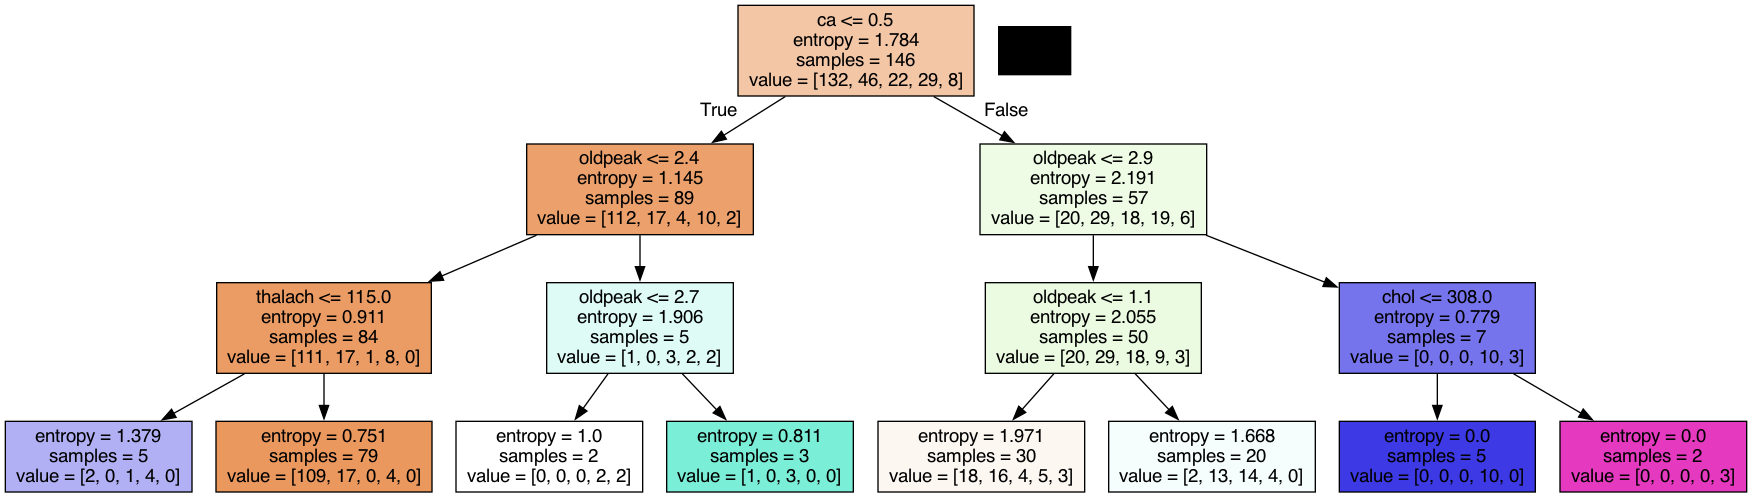

In [96]:
print("\nQuestion 6:")
rf_entropy_top5 = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=3, random_state=42)
rf_entropy_top5.fit(X_train_top5, Y_train_top5)
y_pred = rf_entropy_top5.predict(X_test_top5)
print ("Accuracy of entropy measure of top 5 features: " + str(rf_entropy_top5.score(X_test_top5, Y_test_top5)))

print("\nQuestion 7:")
dot_data = export_graphviz(rf_entropy_top5.estimators_[5], out_file=None, feature_names = list(x_top5.columns.values), filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


In [97]:
print("\nQuestion 8:")
print("The accuracy of the gini criterion is 0.6 (60%) and usingthe top 5 features is 0.6166 (~62%). This shows that the random forest gets more accurate with the 5 most important features.")
print("Comparing it to the accuracy of the entropy criterion, whose accuracy is 0.5833 (~58%) and the gini criterion:")
print("\tthe gini criterion is resulted in the best performance")


Question 8:
The accuracy of the gini criterion is 0.6 (60%) and usingthe top 5 features is 0.6166 (~62%). This shows that the random forest gets more accurate with the 5 most important features.
Comparing it to the accuracy of the entropy criterion, whose accuracy is 0.5833 (~58%) and the gini criterion:
	the gini criterion is resulted in the best performance
